# Pooling

<p><b>Pooling layers</b> are part of Convolutional Neural Networks (CNN). While Convolutional layers are responsible for identifying features in images, Pooling layers play a role in summarizing the features acquired by CNNs. Their primary objective is to progressively reduce the spatial dimensions of the representation, thereby reducing the volume of parameters and computational load within the network. For example, if we take image of size 256x256 and kernel of polling 2x2 then after pooling we will get image of size 128x128. This will reduce the spatial dimensions (width and height) of the input volume while retaining  important features. This process called <i>downsampling</i>.

Here are the terms used in the context of pooling:  
<b>Downsampling</b> - process of reducing the spatial dimensions of input data.  
<b>Kernel size</b> or <b>Pool size</b> - window of some width and height that moves across input feature map and perform operation on values inside it.  
<b>Stride</b> - defines how much the pooling window moves horizontally and vertically after each operation. If the stride is set to 2, the window moves two steps at a time.  
<b>Padding</b> - process of adding extra pixels to the input data, usually with zero values.

<p>There are many types of pooling layers, such Max Pooling, Min Pooling, Average Pooling, Stochastic Polling and etc. but we will discuss only most commonly used types.

## Max pooling

Max Pooling is mainly used type of pooling layer. It retains only the highest value from each kernel matrices and discards the other values.
This means that max pooling will take the sharpest pixels from original image and reduced image consequently will be sharper than original.

```{figure} https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif
:align: center
```

### Example of CNN model with Max pooling layers

<p>Let's see an example of Max pooling with tensorflow keras. We will use MNIST dataset inside of tensorflow. This dataset contains 70000 images for numbers from 0 to 9.

#### Import libraries and dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

#### Build model

In [30]:
max_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

max_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

#### Train and test model

In [47]:
max_pool_model.fit(X_train, y_train, epochs = 1)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0316 - sparse_categorical_accuracy: 0.9898


In [48]:
y_pred_max_pool = max_pool_model.predict(X_test)
y_pred_max_pool = np.argmax(y_pred_max_pool, axis = 1)

313/313 [==============================] - 1s 2ms/step


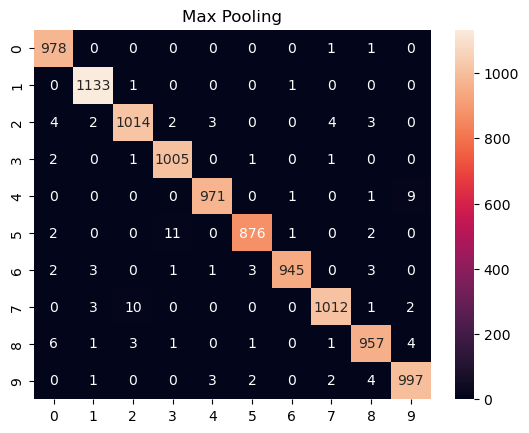

In [49]:
cm_max_pool = confusion_matrix(y_test, y_pred_max_pool)

sns.heatmap(cm_max_pool, annot=True, fmt='g')
plt.title('Max Pooling')
plt.show()

## Average pooling

 In this layer, each local region of the input feature map is subjected to an averaging operation, where the output value represents the mean of the values within that region. It makes resulting image more gradient than the original.

### Example of CNN model with Average pooling layers

#### Build model

In [50]:
avg_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu",),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

avg_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

#### Train and test model

In [51]:
avg_pool_model.fit(X_train, y_train, epochs = 1)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.2853 - sparse_categorical_accuracy: 0.9162


In [52]:
y_pred_avg_pool = avg_pool_model.predict(X_test)
y_pred_avg_pool = np.argmax(y_pred_avg_pool, axis = 1)

313/313 [==============================] - 1s 2ms/step


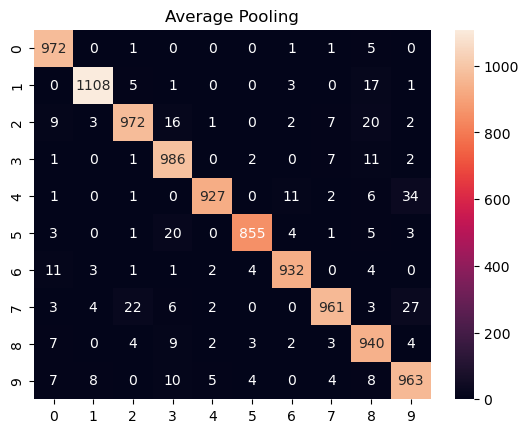

In [53]:
cm_avg_pool = confusion_matrix(y_test, y_pred_avg_pool)

sns.heatmap(cm_avg_pool, annot=True, fmt='g')
plt.title('Average Pooling')
plt.show()

### Comparing of Max and Average Pooling

After Max pooling downsampled image will be highly contrasted and after Average pooling it will be more gradient.  
Max pooling is often used when the goal is to detect specific features or patterns in the input. But always take the most highlighted values not suitable for all cases and can consider data loss.  
Average pooling is used when noise reduction is taken into account.

```{figure} https://miro.medium.com/v2/resize:fit:679/1*fXxDBsJ96FKEtMOa9vNgjA.gif
:align: center
```

`````{admonition} Question
:class: important
In which situation is Max Pooling more suitable and in which Average Pooling?

````{admonition} Answer
:class: tip, dropdown
```{figure} https://cdn-images-1.medium.com/max/659/1*ypIfJX7iWX6h6Kbkfq85Kg.png
:align: center
```
````
`````

## Global max pooling

In Pooling layers that we discussed before, after layer we need Fully connected or Dense layer where each neuron is connected to every neuron in preceding layer. Global Pooling layers can produce one-dimensional single value that can be executed in softmax without Dense layer.

The Global max pooling layer performs max pooling across the entire spatial dimensions of the input feature map. Unlike traditional Max pooling, which operates with a local window or kernel, global max pooling considers the maximum value across the entire feature map for each channel.

```{figure} https://www.researchgate.net/publication/336166764/figure/fig5/AS:809990742884354@1570128250864/Illustrates-the-working-of-Global-Max-Pooling-GMP.ppm
:align: center
```

### Example of CNN model with Global max pooling layer

#### Build model

In [64]:
global_max_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.GlobalMaxPool2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])

global_max_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

#### Train and test model

In [65]:
global_max_pool_model.fit(X_train, y_train, epochs = 1)

1875/1875 [==============================] - 16s 8ms/step - loss: 1.1222 - sparse_categorical_accuracy: 0.6287


In [66]:
y_pred_global_max_pool = global_max_pool_model.predict(X_test)
y_pred_global_max_pool = np.argmax(y_pred_global_max_pool, axis = 1)

313/313 [==============================] - 1s 3ms/step


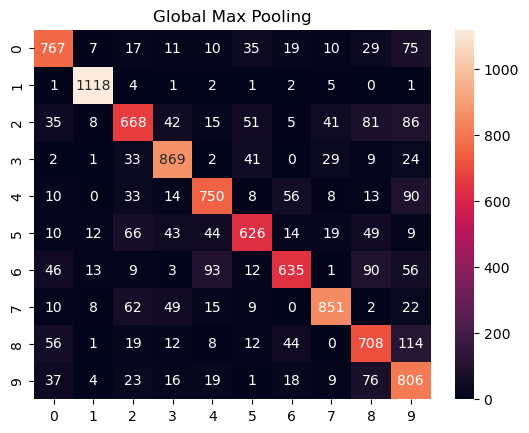

In [67]:
cm_global_max_pool = confusion_matrix(y_test, y_pred_global_max_pool)

sns.heatmap(cm_global_max_pool, annot=True, fmt='g')
plt.title('Global Max Pooling')
plt.show()

## Global average pooling

Similar to Global Max Pooling, Global Average Pooling performs pooling across the entire spatial dimensions of the input feature map, but instead of taking the maximum value, it calculates the average value for each channel

```{figure} https://www.kdnuggets.com/wp-content/uploads/arham_diving_pool_unraveling_magic_cnn_pooling_layers_2.png
:align: center
```

### Example of CNN model with Global average pooling layer

#### Build model

In [77]:
global_avg_pool_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])

global_avg_pool_model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

#### Train and test model

In [78]:
global_avg_pool_model.fit(X_train, y_train, epochs = 1)

1875/1875 [==============================] - 12s 6ms/step - loss: 1.7604 - sparse_categorical_accuracy: 0.3490


In [79]:
y_pred_global_avg_pool = global_avg_pool_model.predict(X_test)
y_pred_global_avg_pool = np.argmax(y_pred_global_avg_pool, axis = 1)

313/313 [==============================] - 1s 2ms/step


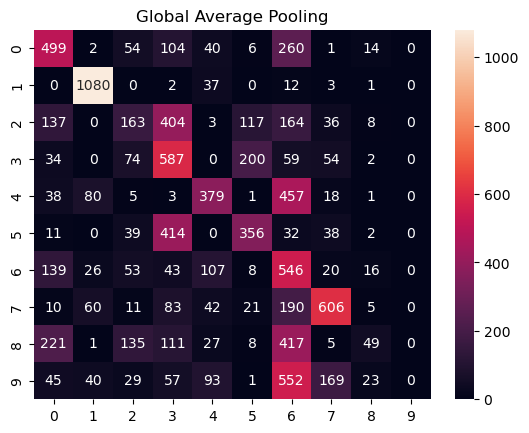

In [80]:
cm_global_avg_pool = confusion_matrix(y_test, y_pred_global_avg_pool)

sns.heatmap(cm_global_avg_pool, annot=True, fmt='g')
plt.title('Global Average Pooling')
plt.show()

This chapter was prepared by:  
Kabyl Dauren (Friday) Project manager  
Omirzak Nurmukhammed (Thursday) Technical writer  
Akhmetgali Abdrakhman (Thursday) Author of executable content  
Doskaraeva Zhanna (Tuesday) Designer of quizzes  